In [240]:
import numpy as np
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [241]:
df = pd.read_csv("ds_chall.csv")

In [242]:
df = df.drop_duplicates(subset="cc_num")
df.shape

(908, 35)

In [243]:
df.describe()

,cc_num,age,gender,HOM_total,HOM_total_freq,HOM_entertainment,HOM_entertainment_freq,HOM_food_dining,HOM_food_dining_freq,HOM_gas_transport,...,HOM_misc_pos,HOM_misc_pos_freq,HOM_personal_care,HOM_personal_care_freq,HOM_shopping_net,HOM_shopping_net_freq,HOM_shopping_pos,HOM_shopping_pos_freq,HOM_travel,HOM_travel_freq
count,9.080000e+02,908.000000,908.000000,908.000000,908.000000,908.00000,908.000000,908.000000,908.000000,908.000000,...,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,4.090328e+17,49.225771,0.493392,1953.701322,28.919604,137.20478,2.114537,107.234736,2.129956,183.879053,...,99.100837,1.704846,99.895771,2.078194,164.934537,2.153084,192.035286,2.581498,97.874868,0.879956
std,1.293983e+18,17.970045,0.500232,1419.524694,16.259647,168.60971,1.816283,124.619398,1.961781,164.667399,...,184.133014,1.631721,119.906625,1.910756,328.075022,2.006528,402.940026,2.190228,536.302003,1.019066
min,6.041621e+10,15.000000,0.000000,77.660000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.800391e+14,34.000000,0.000000,933.335000,15.000000,10.74000,1.000000,10.652500,1.000000,62.500000,...,0.000000,0.000000,3.702500,1.000000,1.950000,1.000000,5.120000,1.000000,0.000000,0.000000
50%,3.521616e+15,48.000000,0.000000,1671.585000,27.000000,78.72000,2.000000,66.510000,2.000000,145.170000,...,14.760000,1.000000,62.970000,2.000000,18.520000,2.000000,23.440000,2.000000,2.985000,1.000000
75%,4.651725e+15,61.000000,1.000000,2586.365000,40.000000,207.66750,3.000000,156.927500,3.000000,274.767500,...,111.797500,3.000000,148.960000,3.000000,184.695000,3.000000,214.765000,4.000000,9.270000,1.000000
max,4.992346e+18,96.000000,1.000000,13353.060000,91.000000,1380.45000,16.000000,870.220000,12.000000,955.690000,...,1324.940000,9.000000,894.920000,11.000000,2491.810000,14.000000,5682.460000,12.000000,11872.210000,6.000000


In [244]:
features=["job","HOM_entertainment","HOM_entertainment_freq"]
df = df.dropna(subset=features)
data = df[features].copy()
data

,job,HOM_entertainment,HOM_entertainment_freq
0,Academic librarian,0.00,0
47,"Accountant, chartered certified",78.29,2
94,"Accountant, chartered public finance",741.45,4
141,"Accountant, chartered public finance",154.67,3
188,Accounting technician,0.00,0
...,...,...,...
42441,Web designer,482.85,4
42488,Wellsite geologist,12.53,1
42535,Wellsite geologist,156.36,3
42582,Wellsite geologist,248.75,1


In [245]:
data.describe()

,HOM_entertainment,HOM_entertainment_freq
count,908.00000,908.000000
mean,137.20478,2.114537
std,168.60971,1.816283
min,0.00000,0.000000
25%,10.74000,1.000000
50%,78.72000,2.000000
75%,207.66750,3.000000
max,1380.45000,16.000000


In [246]:
data['recency'] = data.apply(lambda row: random.randint(1,132), axis=1)
data

,job,HOM_entertainment,HOM_entertainment_freq,recency
0,Academic librarian,0.00,0,15
47,"Accountant, chartered certified",78.29,2,44
94,"Accountant, chartered public finance",741.45,4,3
141,"Accountant, chartered public finance",154.67,3,3
188,Accounting technician,0.00,0,48
...,...,...,...,...
42441,Web designer,482.85,4,52
42488,Wellsite geologist,12.53,1,1
42535,Wellsite geologist,156.36,3,80
42582,Wellsite geologist,248.75,1,126


In [247]:
data = data.drop_duplicates(subset='job')
rfm = data.groupby('job').agg({'recency':lambda recency:recency,'HOM_entertainment_freq':lambda frecuency:frecuency.nunique(),'HOM_entertainment':lambda monetary:monetary})
rfm.head()

,recency,HOM_entertainment_freq,HOM_entertainment
job,,,
Academic librarian,15,1,0.00
"Accountant, chartered certified",44,1,78.29
"Accountant, chartered public finance",3,1,741.45
Accounting technician,48,1,0.00
Acupuncturist,114,1,0.00


In [248]:
rfm.columns =['recency','frequency','monetary']
rfm = rfm[rfm['monetary']>0]
rfm.head()

,recency,frequency,monetary
job,,,
"Accountant, chartered certified",44,1,78.29
"Accountant, chartered public finance",3,1,741.45
Administrator,93,1,172.20
"Administrator, arts",76,1,77.09
"Administrator, charities/voluntary organisations",110,1,154.71


In [249]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm['score']=rfm['recency_score'].astype(int)+rfm['frequency_score'].astype(int)+rfm['monetary_score'].astype(int)
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score
job,,,,,,,
"Accountant, chartered certified",44,1,78.29,4,1,2,7
"Accountant, chartered public finance",3,1,741.45,5,1,5,11
Administrator,93,1,172.20,2,1,4,7
"Administrator, arts",76,1,77.09,3,1,2,6
"Administrator, charities/voluntary organisations",110,1,154.71,1,1,3,5


In [250]:
rfm[rfm['score']== rfm['score'].max()].sort_values('monetary', ascending=False).head()#interchangable with max and min

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score
job,,,,,,,
Tax adviser,8,1,577.78,5,5,5,15
Structural engineer,5,1,503.99,5,5,5,15
"Surveyor, rural practice",6,1,397.97,5,5,5,15
Surgeon,21,1,374.11,5,5,5,15
"Therapist, art",18,1,307.40,5,5,5,15


In [251]:
def rfm_level(score):
    if  ((score >1) and (score < 4)):
        return 'Low Spender'
    elif ((score >3) and (score < 8)):
        return 'Average Spender'
    elif ((score > 7) and (score <11)):
        return 'Mid-High Spender'
    else:
        return 'High Spender'

rfm['level'] = rfm['score'].apply(lambda score : rfm_level(score))
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,level
job,,,,,,,,
"Accountant, chartered certified",44,1,78.29,4,1,2,7,Average Spender
"Accountant, chartered public finance",3,1,741.45,5,1,5,11,High Spender
Administrator,93,1,172.20,2,1,4,7,Average Spender
"Administrator, arts",76,1,77.09,3,1,2,6,Average Spender
"Administrator, charities/voluntary organisations",110,1,154.71,1,1,3,5,Average Spender


In [253]:
high_sp = rfm[rfm['level'] == 'High Spender']
avg_sp = rfm[rfm['level'] == 'Average Spender']
mh_sp = rfm[rfm['level'] == 'Mid-High Spender']
low_sp = rfm[rfm['level'] == 'Low Spender']

In [254]:
rfm.describe()

,recency,frequency,monetary,score
count,387.000000,387.0,387.000000,387.000000
mean,64.511628,1.0,169.741964,9.020672
std,38.791014,0.0,165.954060,2.441987
min,1.000000,1.0,1.080000,3.000000
25%,31.000000,1.0,45.475000,7.000000
50%,62.000000,1.0,123.200000,9.000000
75%,97.500000,1.0,240.210000,11.000000
max,132.000000,1.0,888.070000,15.000000


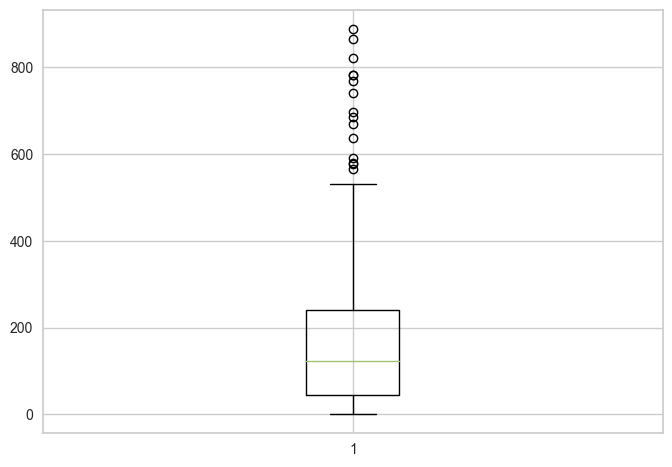

In [257]:
#outlier treatment for  monetary
plt.boxplot(rfm.monetary)
Q1 = rfm.monetary.quantile(0.25)
Q3 = rfm.monetary.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.monetary >= (Q1 - 1.5*IQR)) & (rfm.monetary <= (Q3 + 1.5*IQR))]

In [258]:
# applying k means and elbow method
rfm1=rfm[['recency','frequency','monetary']]
scaler = StandardScaler()
x_scaled=scaler.fit(rfm1)
x_scaled = scaler.fit_transform(rfm1)
x_scaled

array([[-0.54668388,  0.        , -0.55259427],
       [ 0.71278955,  0.        ,  0.19243436],
       [ 0.27582938,  0.        , -0.56211439],
       ...,
       [ 0.60997539,  0.        , -0.70848622],
       [-0.77801573,  0.        , -0.31982737],
       [-1.65193607,  0.        , -1.07429678]])

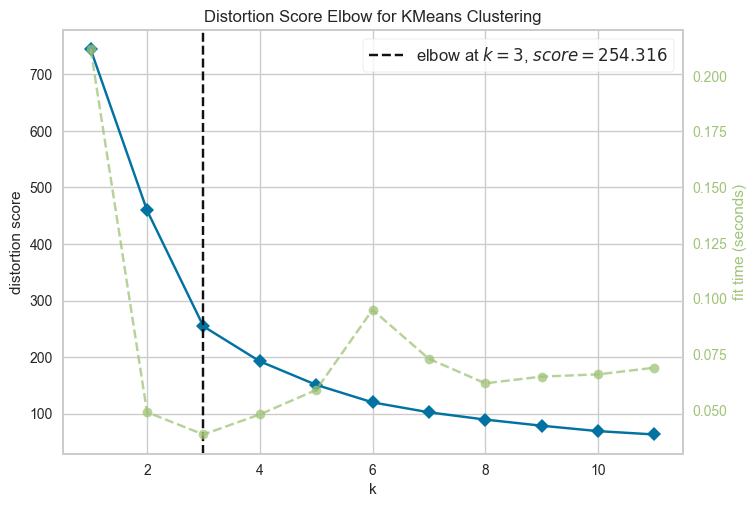

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [259]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(x_scaled)  
visualizer.show()   

[1 0 1 0 0 1 0 0 0 1 1 2 1 1 1 1 2 1 0 2 1 1 0 0 1 1 1 2 1 1 1 0 1 1 0 2 2
 1 0 1 2 0 0 1 1 0 1 0 1 0 0 2 1 1 1 2 2 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0
 2 1 0 1 1 1 1 1 1 2 0 1 2 2 2 2 1 2 1 1 2 2 0 1 0 0 1 0 1 0 1 0 1 0 0 0 2
 0 0 0 0 1 1 2 1 2 2 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 2 0 0 1 1 1 0 1 0 1 1
 0 1 0 1 0 1 1 0 1 2 1 2 1 2 0 1 0 2 2 1 1 1 1 0 1 1 2 1 1 0 1 2 1 0 1 1 1
 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 2 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 2 0 1 1 2 1 1 1 1 2 2 1 2 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 2 1 0 0
 1 1 1 0 1 0 1 0 1 0 1 1 1 1 2 1 0 0 0 0 1 1 2 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 2 2 2 1 1 1 1
 2 0 2 1 1 0 1 2 1 1 1 1 1 0 0 1 0 2 2 0 1 2 0 0 0 0 1 2 0 1 0 0 0 1 0 1 1
 1 1]
 Our cluster centers are as follows
[[-0.87040954  0.         -0.48784245]
 [-0.07943025  0.          1.50315638]
 [ 0.96780538  0.         -0.38617466]]


,recency,frequency,monetary
cluster_pred,,,
0,148,148,148
1,84,84,84
2,140,140,140


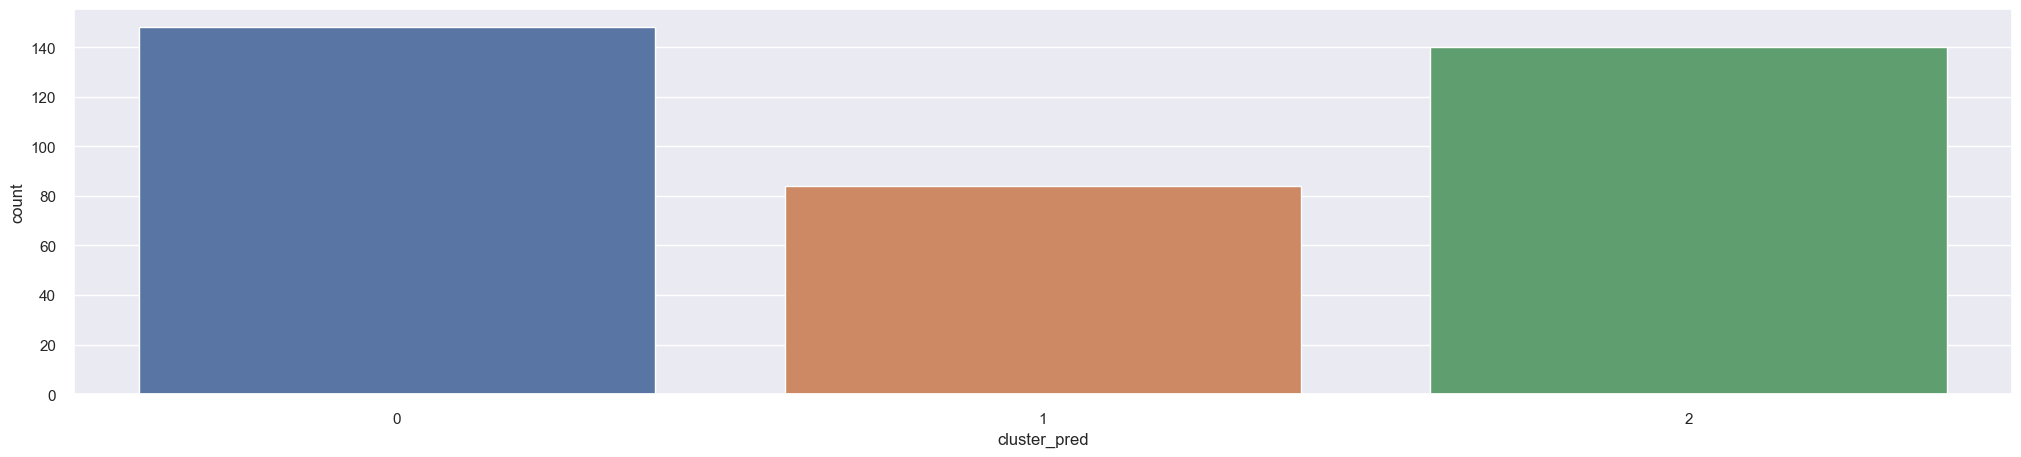

In [260]:
kmeans_scaled = KMeans(3)
kmeans_scaled.fit(x_scaled)
identified_clusters = kmeans_scaled.fit_predict(rfm1)
clusters_scaled = rfm1.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)
print(identified_clusters)
sns.set(style="darkgrid")
print(" Our cluster centers are as follows")
print(kmeans_scaled.cluster_centers_)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster_pred", data=clusters_scaled)
clusters_scaled.groupby(['cluster_pred']).count()

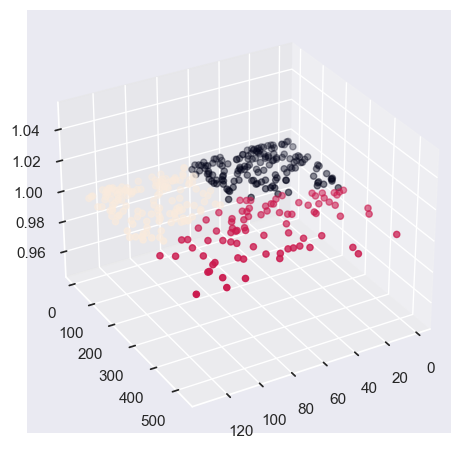

In [261]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xline=clusters_scaled['recency']
yline=clusters_scaled['frequency']
zline=clusters_scaled['monetary']

ax.scatter3D(xline, zline,yline,c=clusters_scaled['cluster_pred'])
ax.view_init(30, 60)

Silhouette Score: 0.437


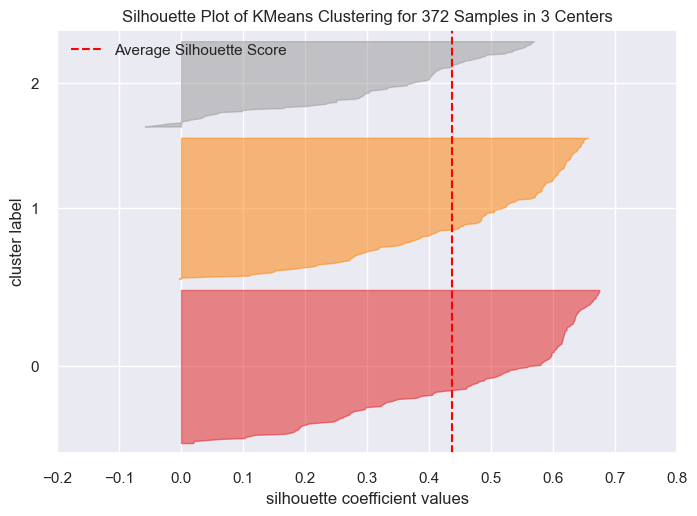

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 372 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [262]:
#validation using silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
sil_score = silhouette_score(x_scaled, kmeans_scaled.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % sil_score)

from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(x_scaled)   
visualizer.poof()   

In [263]:
rfm1['cluster']= clusters_scaled['cluster_pred']
rfm1['level']=rfm['level']

rfm1.groupby('cluster').agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'monetary' : ['mean','min','max','count']
})

C:\Users\james\AppData\Local\Temp\ipykernel_13408\3470046792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm1['cluster']= clusters_scaled['cluster_pred']
C:\Users\james\AppData\Local\Temp\ipykernel_13408\3470046792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm1['level']=rfm['level']


recency          frequency            monetary                  \
               mean min  max      mean min max        mean     min     max   
cluster                                                                      
0         31.405405   1   67       1.0   1   1   86.451892    1.08  261.81   
1         62.178571   3  129       1.0   1   1  337.415000  199.84  531.61   
2        102.921429  69  132       1.0   1   1   99.267000    1.86  272.57   

               
        count  
cluster        
0         148  
1          84  
2         140